# AREF JOZI
#### This is my tutorial project of a dataset including some features about 300 patients and their medical information . The purpose is to estimate the probability of heart attack(low chance is 0 and high chance is 1). 
#### Done by Aref Jozi on Jan 2023
#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 3 (Regression) of Machine Learning by Python
#### Program Sequence:
#### the number of samples in this dataset is under 1000, also distribution of datas is not clear so the first chosen method of classification is SVM
### CLASSIFICATION
- Intro
- importing libraries
- calling and details
- preprocessing
- most relevant features
- split test and train set
- plotting the data
- modeling
- prediction

## [importing libraries]

In [11]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## [Loading dataset and checking]

In [12]:
# the address of the file may differ on different systems
heart_df = pd.read_csv("e:/heart.csv")
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
heart_df.shape

(303, 14)

In [14]:
heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

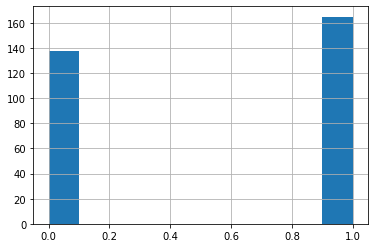

In [15]:
heart_df['output'].hist()

## [plotting the dataset]

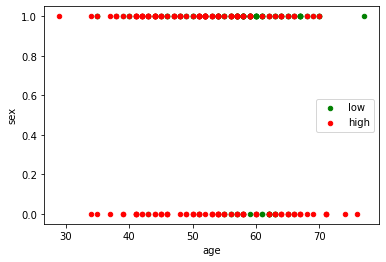

In [20]:
# plotting age and sex
ax = heart_df[heart_df['output']==0][0:300].plot(kind='scatter',x='age' , y='sex' , color='green', label='low');
heart_df[heart_df['output']==1][0:300].plot(kind='scatter',x='age' , y='sex' , color='red', label='high',ax=ax);
plt.show()

In [21]:
# no relation is observed >>> other features must be plotted

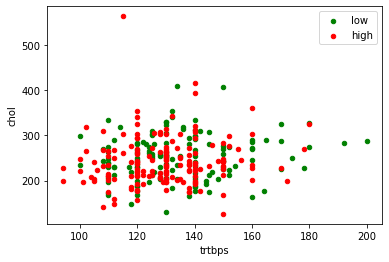

In [19]:
# plotting trtbps and chol
ax = heart_df[heart_df['output']==0][0:300].plot(kind='scatter',x='trtbps' , y='chol' , color='green', label='low');
heart_df[heart_df['output']==1][0:300].plot(kind='scatter',x='trtbps' , y='chol' , color='red', label='high',ax=ax);
plt.show()

####   ******in conclusion SVM seems be a good method of classification to predict this dataset******

In [23]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [25]:
# all of the datas are int or float >>> OK
# a domain expert should tell us which features are more important
# so as there is no expert or explanation, we consider all of the features for prediction

In [27]:
feature_df = heart_df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
x = np.asarray(feature_df)
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [35]:
y = np.asarray(heart_df['output'])
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## [Train/Test the Dataset]

In [32]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


## Modeling(SVM via scikit-learn)

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [48]:
yhat = clf.predict(x_test)
yhat [0:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
# first look comparison between y(real) and yhat(predict)
# y     >>  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)
# yhat  >>  array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)
# it seems to be good

## [Evaluation]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        25
           1       0.67      0.86      0.76        36

    accuracy                           0.67        61
   macro avg       0.67      0.63      0.63        61
weighted avg       0.67      0.67      0.65        61

Confusion matrix, without normalization
[[10 15]
 [ 5 31]]


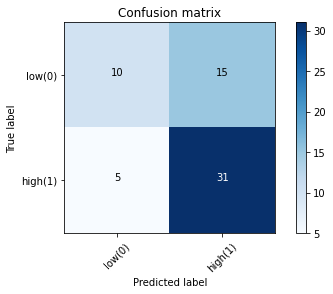

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low(0)','high(1)'],normalize= False,  title='Confusion matrix')

In [41]:
# f1-score and jaccard-score

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6511395441823271

In [53]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.3333333333333333

In [55]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.6078431372549019

## [conclusion]

In [45]:
# based on the results it seems that either the classification method(SVM) or kernel method shall be changed